In [61]:
!pip install seaborn


### Problem Definition
In a statement:

**Given the textual reviews, ratings, and other product-related attributes, can we predict the sentiment labels of reviews as positive, negative, or neutral?**

---

### Data
This dataset contains product reviews and related metadata, such as product prices, ratings, and textual review content. Each review is classified into a sentiment label: **positive**, **negative**, or **neutral**. 

---

### Features
Below is the data dictionary, describing each feature in detail:

1. **product_name**:  
   - Description: The name of the product that the review is associated with.  
   - Example: "Canon EOS 3000D DSLR Camera" or "OnePlus Bullets Wireless Z2 Headset".

2. **product_price**:  
   - Description: The price of the product in currency units. Higher prices might indicate premium products.  
   - Example: 30999 (for an expensive camera) or 1499 (for an affordable electric cooker).

3. **Rate**:  
   - Description: The numerical rating given by the reviewer, usually on a scale of 1 to 5.  
   - Values:  
     - 5: Excellent  
     - 4: Very Good  
     - 3: Good  
     - 2: Fair  
     - 1: Poor  

4. **Review**:  
   - Description: A short summary of the user’s opinion about the product.  
   - Example: "Mindblowing purchase" or "Very poor quality".  
   - Note: Often indicative of the overall sentiment but less detailed than the "text" feature.

5. **text**:  
   - Description: The detailed textual review written by the user, providing insights into their experience.  
   - Example:  
     - Positive: "The product is amazing, the sound quality and battery life are great."  
     - Negative: "Very poor quality, it stopped working after just one use."

6. **labels**:  
   - Description: The sentiment classification of the review. This is the target variable we aim to predict.  
   - Values:  
     - **positive**: Indicates a favorable review.  
     - **neutral**: Indicates a mixed or indifferent review.  
     - **negative**: Indicates a poor or unfavorable review.  

7. **sentiment_code**:  
   - Description: A numerical encoding of the labels for easier processing in machine learning models.  
   - Values:  
     - 2: Positive sentiment.  
     - 1: Neutral sentiment.  
     - 0: Negative sentiment.  



## Preparing the tools

We're going to use pandas, numpy ,Matplotlib and NUmpy for data analysis and manupulation

In [2]:
import pandas as pd

In [21]:
# Import all the tools we need

# Regular EDA and plotting Librarries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay,roc_curve,roc_auc_score
from sklearn import metrics

## Load data

In [4]:
df = pd.read_csv("modified_cleaned_datathon.csv")
df.shape, df.columns

((2000, 9),
 Index(['product_name', 'product_price', 'Rate', 'Review', 'text', 'labels',
        'sentiment_code', 'common_name', 'model_count'],
       dtype='object'))

## Data Exploration (exploatory data anylisis or EDA)
The gole here is to find out moreabout data and become a subject matter on the dataset you're working with
1. What questions are we trying to solve ?.
2. What kind of data do we have and how do we treat diffrent types ?
3. What's missing from the data how we deal with it ?
4. Where are the outliers and why should you care about them ?
5. How can you add change or remove features to get more out of your data ?

In [5]:
# Now we will delete the extra columns
df = df.drop('model_count',axis = 1)
df.head()

,product_name,product_price,Rate,Review,text,labels,sentiment_code,common_name
0,canon eos 3000d dslr camera 1 camera body 18 ...,30999.0,5.0,mindblowing purchase,nice,positive,2,canon
1,flipkart smartbuy cfxb15 electric rice cooker1...,1499.0,2.0,moderate,very poor quality,negative,0,flipkart
2,google nest hub 2nd gen display with google as...,6999.0,5.0,awesome,far better and cheaper than alexa,positive,2,google
3,wd 15 tb wired external hard disk drive hddblack,4449.0,5.0,fabulous,i would like to suggest this for persons looki...,positive,2,wd
4,oneplus bullets wireless z2 bluetooth headseta...,1999.0,5.0,super,the product is amazing the sound quality and b...,positive,2,oneplus


In [6]:
df["labels"].value_counts()

labels
positive    1608
negative     313
neutral       79
Name: count, dtype: int64

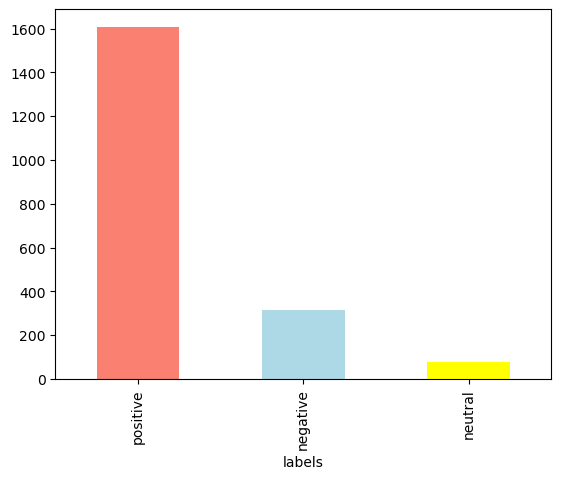

In [7]:
df["labels"].value_counts().plot(kind="bar",color=["salmon","lightblue","yellow"])
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_name    2000 non-null   object 
 1   product_price   2000 non-null   float64
 2   Rate            2000 non-null   float64
 3   Review          2000 non-null   object 
 4   text            2000 non-null   object 
 5   labels          2000 non-null   object 
 6   sentiment_code  2000 non-null   int64  
 7   common_name     2000 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 125.1+ KB


In [9]:
df.isna().sum()

product_name      0
product_price     0
Rate              0
Review            0
text              0
labels            0
sentiment_code    0
common_name       0
dtype: int64

In [10]:
df.describe()

,product_price,Rate,sentiment_code
count,2000.000000,2000.000000,2000.000000
mean,7150.353500,4.093000,1.647500
std,10760.066713,1.361719,0.735877
min,59.000000,1.000000,0.000000
25%,699.000000,4.000000,2.000000
50%,1999.000000,5.000000,2.000000
75%,7999.000000,5.000000,2.000000
max,52990.000000,5.000000,2.000000


### Data Frequency according to sentiment_code

In [11]:
df.sentiment_code.value_counts()

sentiment_code
2    1608
0     313
1      79
Name: count, dtype: int64

In [14]:
# Here we have converted the target values in numberic form 
df["labels"].replace("positive", 0,inplace=True)
df["labels"].replace("negative", 1,inplace=True)
df["labels"].replace("neutral", 2,inplace=True)

In [15]:
df.head()

,product_name,product_price,Rate,Review,text,labels,sentiment_code,common_name
0,canon eos 3000d dslr camera 1 camera body 18 ...,30999.0,5.0,mindblowing purchase,nice,0,2,canon
1,flipkart smartbuy cfxb15 electric rice cooker1...,1499.0,2.0,moderate,very poor quality,1,0,flipkart
2,google nest hub 2nd gen display with google as...,6999.0,5.0,awesome,far better and cheaper than alexa,0,2,google
3,wd 15 tb wired external hard disk drive hddblack,4449.0,5.0,fabulous,i would like to suggest this for persons looki...,0,2,wd
4,oneplus bullets wireless z2 bluetooth headseta...,1999.0,5.0,super,the product is amazing the sound quality and b...,0,2,oneplus


In [16]:
#Compare target with sentement code column
pd.crosstab(df.labels,df.sentiment_code)

sentiment_code,0,1,2
labels,,,
0,0,0,1608
1,313,0,0
2,0,79,0


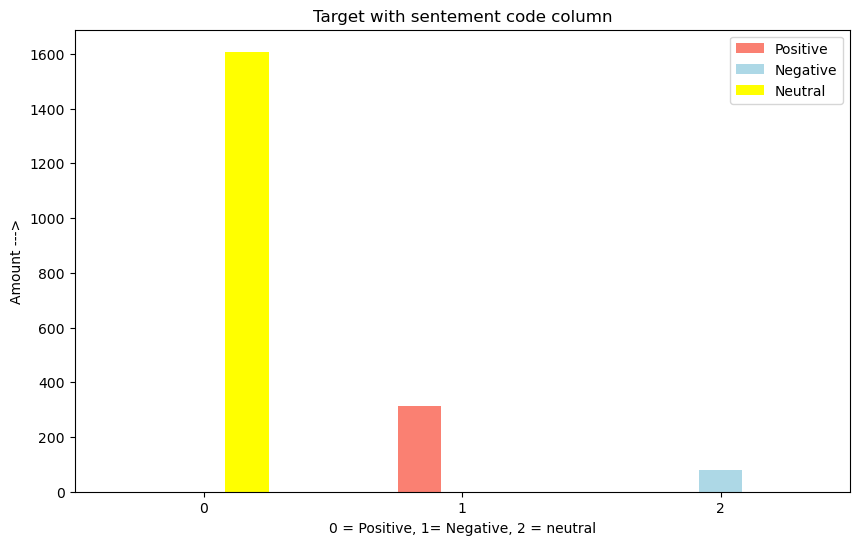

In [17]:
# Create a plot a crosstab
pd.crosstab(df.labels,df.sentiment_code).plot(kind='bar',
                                   figsize = (10,6),
                                   color =["salmon","lightblue","yellow"])
plt.title("Target with sentement code column")
plt.xlabel("0 = Positive, 1= Negative, 2 = neutral")
plt.ylabel("Amount --->")
plt.legend(["Positive","Negative","Neutral"]);
plt.xticks(rotation=0);
plt.show()

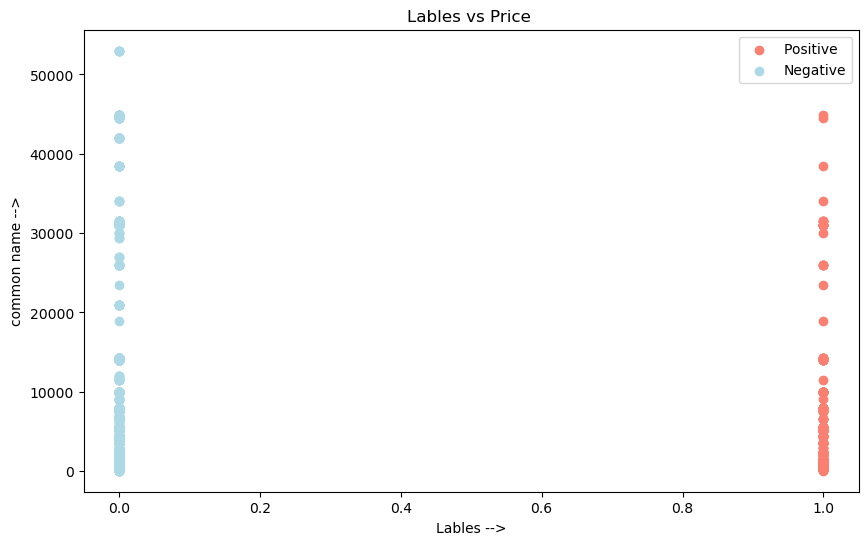

In [18]:
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.labels[df.labels==1],
            df.product_price[df.labels==1],
            c="salmon")
plt.scatter(df.labels[df.labels==0],
            df.product_price[df.labels==0],
            c="lightblue")
#Add some helful info
plt.title("Lables vs Price ")
plt.xlabel("Lables -->")
plt.ylabel("common name -->")
plt.legend(["Positive ","Negative","Neutral"])
plt.show();

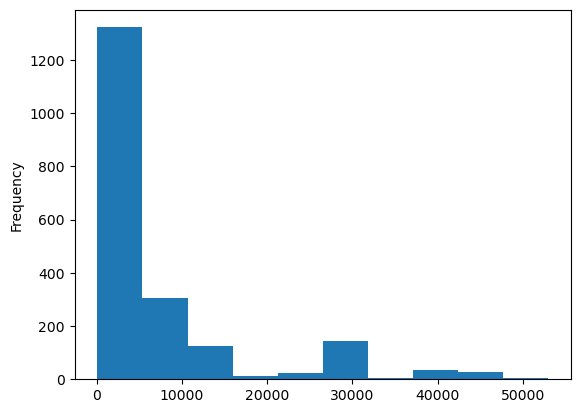

In [19]:
# Chech the distribution of age column with a histogram
df.product_price.plot.hist()
plt.show()